In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [1]:
import librosa
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import glob
import os
from imblearn.over_sampling import SMOTE

ai_features_train_test_fullset=np.load('/content/drive/MyDrive/ai_features_full_1.npy')
ai_labels_train_test_fullset=np.zeros(len(ai_features_train_test_fullset))

human_features_train_test_fullset=np.load('/content/drive/MyDrive/bona_features_full_1.npy')
human_labels_train_test_fullset=np.ones(len(human_features_train_test_fullset))


x_train,X_test,y_train,y_test=train_test_split(np.concatenate([ai_features_train_test_fullset,human_features_train_test_fullset]),
                                             np.concatenate([ai_labels_train_test_fullset,human_labels_train_test_fullset]),test_size=0.3,train_size=0.7,random_state=38)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.20,train_size =0.8,random_state=38)

del ai_features_train_test_fullset
del human_features_train_test_fullset
del ai_labels_train_test_fullset
del human_labels_train_test_fullset

np.save(f'x_train.npy', x_train)
np.save(f'x_val.npy', x_val)
np.save(f'y_train.npy', y_train)
np.save(f'y_val.npy', y_val)
np.save(f'y_test.npy', y_test)
np.save(f'X_test.npy', X_test)

del x_train,X_test,y_train,y_test, x_val,y_val

In [2]:
import librosa
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import glob
import os
from imblearn.over_sampling import SMOTE

ai_features_train_test_fullset=np.load('/content/drive/MyDrive/ai_features_full_2.npy')
ai_labels_train_test_fullset=np.zeros(len(ai_features_train_test_fullset))

human_features_train_test_fullset=np.load('/content/drive/MyDrive/bona_features_full_2.npy')
human_labels_train_test_fullset=np.ones(len(human_features_train_test_fullset))


x_train,X_test,y_train,y_test=train_test_split(np.concatenate([ai_features_train_test_fullset,human_features_train_test_fullset]),
                                             np.concatenate([ai_labels_train_test_fullset,human_labels_train_test_fullset]),test_size=0.3,train_size=0.7,random_state=38)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2,train_size =0.8,random_state=38)

del ai_features_train_test_fullset
del human_features_train_test_fullset
del ai_labels_train_test_fullset
del human_labels_train_test_fullset

np.save(f'x_train2.npy', x_train)
np.save(f'x_val2.npy', x_val)
np.save(f'y_train2.npy', y_train)
np.save(f'y_val2.npy', y_val)
np.save(f'y_test2.npy', y_test)
np.save(f'X_test2.npy', X_test)

del x_train,X_test,y_train,y_test, x_val,y_val

In [1]:
import numpy as np
x_train = np.load('/content/x_train.npy')
y_train = np.load('/content/y_train.npy')
x_train2 = np.load('/content/x_train2.npy')
y_train2 = np.load('/content/y_train2.npy')

x_train = np.concatenate([x_train, x_train2])
y_train = np.concatenate([y_train, y_train2])

del x_train2,y_train2
x_train = np.expand_dims(x_train, axis=2)

x_val = np.load('/content/x_val.npy')
y_val = np.load('/content/y_val.npy')
x_val2 = np.load('/content/x_val2.npy')
y_val2 = np.load('/content/y_val2.npy')

x_val = np.concatenate([x_val, x_val2])
y_val = np.concatenate([y_val, y_val2])

del x_val2,y_val2

x_val = np.expand_dims(x_val, axis=2)


In [2]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM,Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras import backend as K
# y_train = to_categorical(y_train, num_classes=2)
# y_val = to_categorical(y_val, num_classes=2)


model = Sequential()
model.add(Conv1D(64, kernel_size=5, padding='same', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(256, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

# model.add(Conv1D(512, kernel_size=5, padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.4))


# model.add(LSTM(512, return_sequences=True))
# model.add(LSTM(512))
# model.add(Dropout(0.5))

model.add(LSTM(256))
model.add(Dropout(0.3))

# Flatten слой
model.add(Flatten())

# Полносвязные (Dense) слои
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Выходной слой с активацией Sigmoid для бинарной классификации
model.add(Dense(1, activation='sigmoid'))


# Компиляция модели
optimizer = Adam(learning_rate=0.001)
# Компиляция модели
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

# Определение ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Обучение модели
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val), callbacks=[early_stopping])


import pickle


model.save('/content/drive/MyDrive/model_fin_bin_full_test05.h5')

with open('/content/drive/MyDrive/model_fin_bin_full_test05.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

del x_train,x_val,y_train,y_val

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2080, 64)            │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2080, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1040, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1040, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1040, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1040, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 520, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 520, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 520, 256)            │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 520, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 260, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 260, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 833,025 (3.18 MB)

 Trainable params: 831,361 (3.17 MB)

 Non-trainable params: 1,664 (6.50 KB)

None
Epoch 1/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 299s 78ms/step - accuracy: 0.6628 - loss: 0.6221 - val_accuracy: 0.8145 - val_loss: 0.4376
Epoch 2/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 284s 77ms/step - accuracy: 0.8506 - loss: 0.3547 - val_accuracy: 0.9360 - val_loss: 0.1787
Epoch 3/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 323s 78ms/step - accuracy: 0.9281 - loss: 0.1941 - val_accuracy: 0.9209 - val_loss: 0.2226
Epoch 4/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 321s 77ms/step - accuracy: 0.9456 - loss: 0.1500 - val_accuracy: 0.9390 - val_loss: 0.1732
Epoch 5/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 323s 78ms/step - accuracy: 0.9542 - loss: 0.1287 - val_accuracy: 0.9680 - val_loss: 0.0921
Epoch 6/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 321s 78ms/step - accuracy: 0.9594 - loss: 0.1157 - val_accuracy: 0.9713 - val_loss: 0.0795
Epoch 7/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 285s 78ms/step - accuracy: 0.9630 - loss: 0.1055 - val_accuracy: 0.9724 - val_loss: 0.0804
Epoch 8/10
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 323s 78ms/step - accur

In [4]:
import numpy as np
x_test = np.load('/content/X_test.npy')
y_test = np.load('/content/y_test.npy')
x_test2 = np.load('/content/X_test2.npy')
y_test2 = np.load('/content/y_test2.npy')

x_test = np.concatenate([x_test, x_test2])
y_test = np.concatenate([y_test, y_test2])

del x_test2,y_test2

3940/3940 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step
Accuracy: 0.9763238046892351
F1 Score: 0.9792965688484454


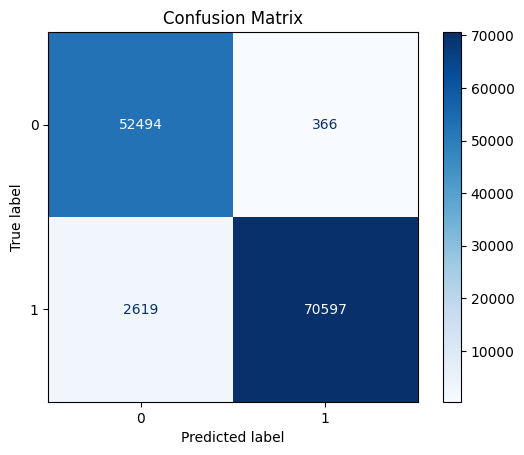

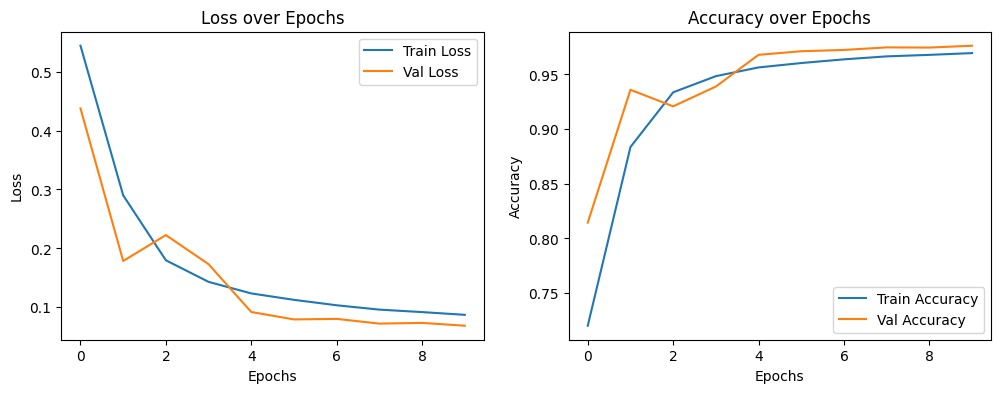

In [5]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Подготовка тестовых данных (пример)
# x_test - тестовые данные, y_test - истинные метки
# X_test = np.expand_dims(X_test, axis=2)
# y_test = to_categorical(y_test, num_classes=2)  # если у вас есть одно-горячее кодирование

# Выполнение прогнозирования
y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

with open('/content/drive/MyDrive/model_fin_bin_full_test05.pkl', 'rb') as file_pi:
    history = pickle.load(file_pi)

# Графики обучения
plt.figure(figsize=(12, 4))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

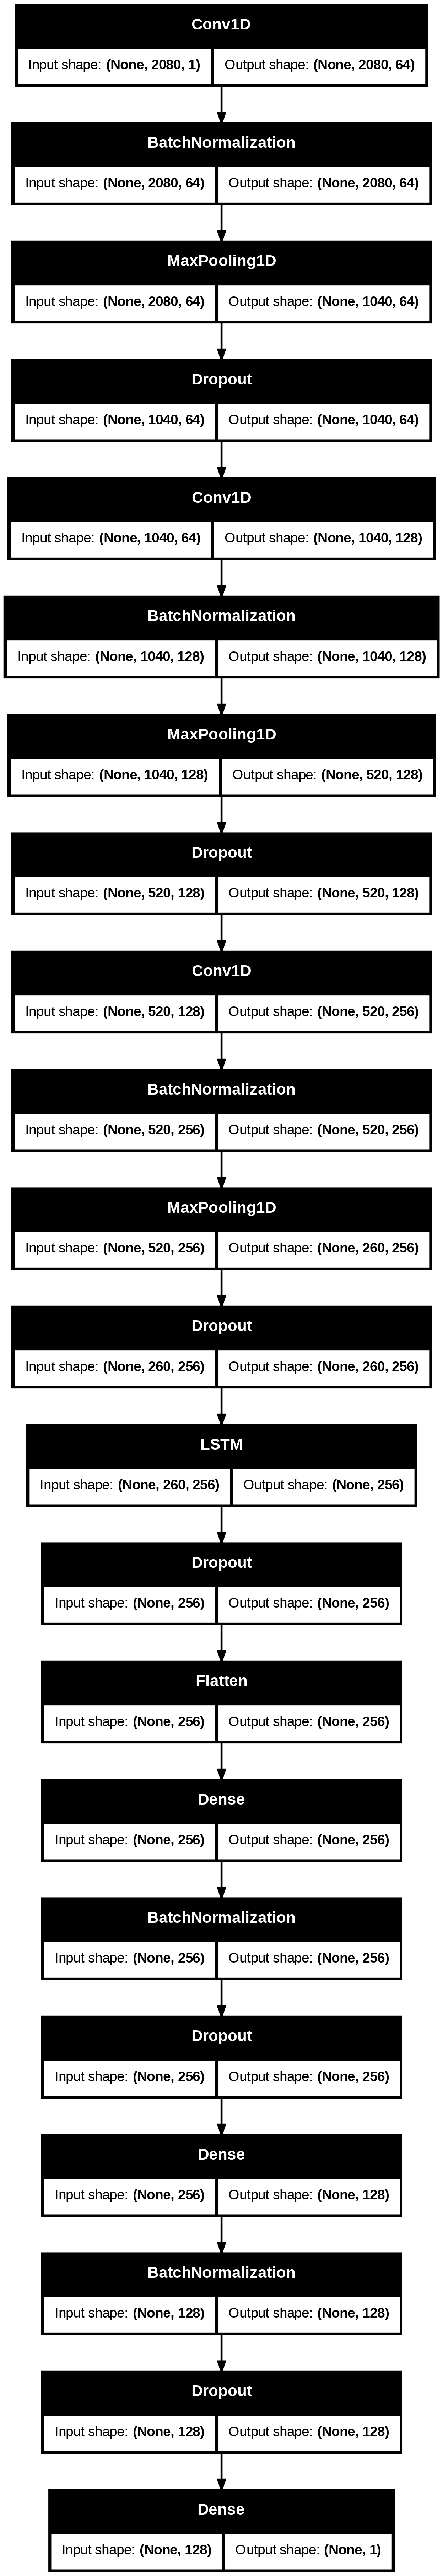

In [4]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/model_fin_bin_full_test05.h5')
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)